In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

In [6]:
from sklearn.datasets import make_circles

x , y = make_circles(100 , factor = 0.1 , noise = 0.1)

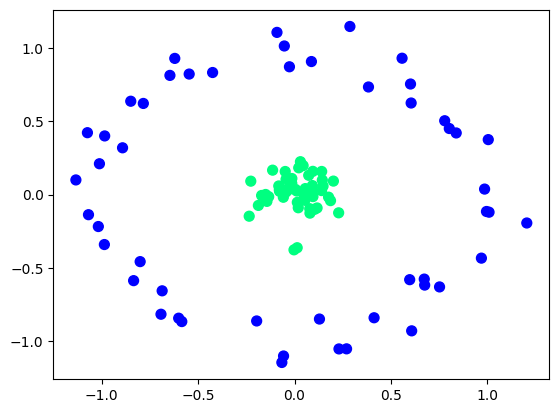

In [7]:
plt.scatter(x[:, 0], x[: , 1], c = y ,  s= 50 , cmap = 'winter')

In [8]:
x_train , x_test , y_train , y_test = train_test_split(x ,y , test_size = 0.2, random_state = 3)

In [9]:
classifier = SVC(kernel = 'linear')
classifier.fit(x_train , y_train)
y_pred = classifier.predict(x_test )

In [11]:
accuracy_score(y_test , y_pred)

0.4

VERY POOR

In [13]:
from matplotlib.colors import ListedColormap

In [14]:
zero_one_colourmap = ListedColormap(('blue', 'red'))
def plot_decision_boundary(X, y, clf):
    X_set, y_set = X, y
    X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1,
                                 stop = X_set[:, 0].max() + 1,
                                 step = 0.01),
                       np.arange(start = X_set[:, 1].min() - 1,
                                 stop = X_set[:, 1].max() + 1,
                                 step = 0.01))

    plt.contourf(X1, X2, clf.predict(np.array([X1.ravel(),
                                             X2.ravel()]).T).reshape(X1.shape),
               alpha = 0.75,
               cmap = zero_one_colourmap)
    plt.xlim(X1.min(), X1.max())
    plt.ylim(X2.min(), X2.max())
    for i, j in enumerate(np.unique(y_set)):
        plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = (zero_one_colourmap)(i), label = j)
    plt.title('SVM Decision Boundary')
    plt.xlabel('X1')
    plt.ylabel('X2')
    plt.legend()
    return plt.show()

<ipython-input-14-50c9684d90d2>:18: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],


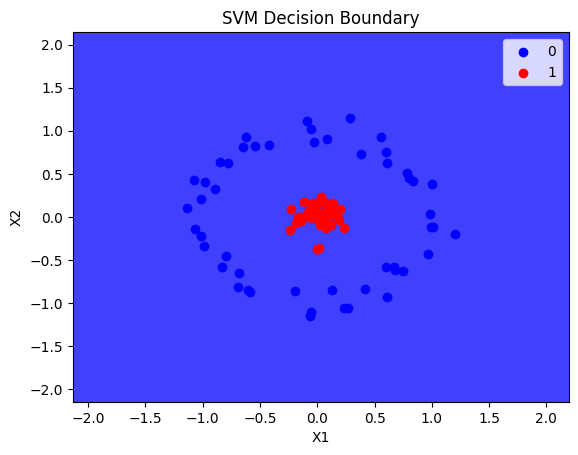

In [15]:
plot_decision_boundary(x,y,classifier)

In [16]:
# ploting higher or transformed graph
def plot_3d_plot(X, y):
    r = np.exp(-(X ** 2).sum(1))
    ax = plt.subplot(projection='3d')
    ax.scatter3D(X[:, 0], X[:, 1], r, c=y, s=100, cmap='bwr')
    ax.set_xlabel('X1')
    ax.set_ylabel('X2')
    ax.set_zlabel('y')
    return ax

<Axes3D: xlabel='X1', ylabel='X2', zlabel='y'>

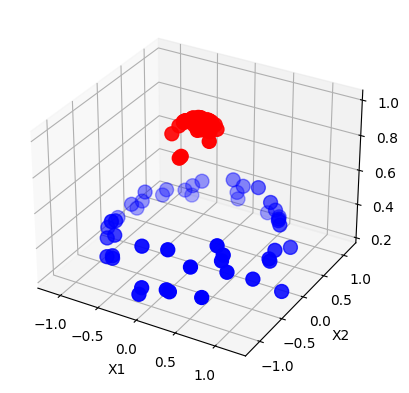

In [17]:
plot_3d_plot(x,y)

In [18]:
# rbf = radial basis funtion f(x) = e^(x**2)
rbf_classifier = SVC(kernel = 'rbf')
rbf_classifier.fit(x_train ,y_train )
y_pred = rbf_classifier.predict(x_test)

In [25]:
accuracy_score(y_test , y_pred)

1.0

In [24]:
print(str(round(accuracy_score(y_test , y_pred)*100)) + '%')

100%


<ipython-input-14-50c9684d90d2>:18: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],


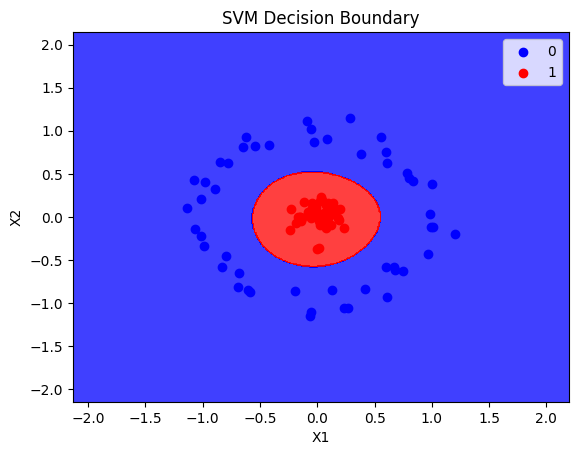

In [27]:

plot_decision_boundary(x, y, rbf_classifier)

In [28]:
poly_classifier = SVC(kernel="poly",degree=2)
poly_classifier.fit(x_train, y_train)
y_pred = poly_classifier.predict(x_test)

In [30]:
accuracy_score(y_test, y_pred)

1.0

VERY GOOD

<ipython-input-14-50c9684d90d2>:18: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],


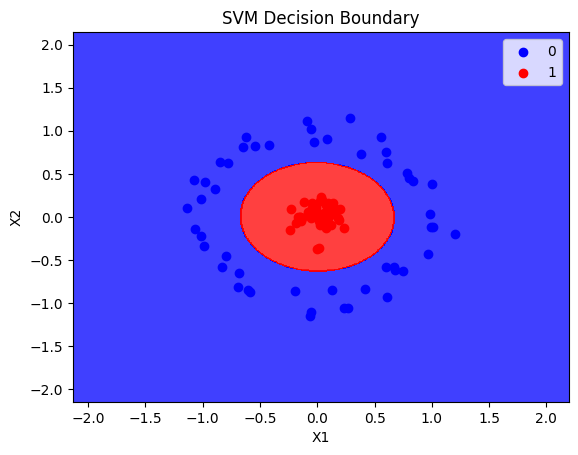

In [32]:
plot_decision_boundary(x, y, poly_classifier)

**What actually doing with data**

In [33]:
x

array([[ 0.05359666, -0.03848111],
       [ 0.96894746, -0.43331119],
       [ 0.55763217,  0.93155656],
       [ 0.20153283,  0.09269549],
       [ 0.08809104,  0.03937891],
       [ 0.6014006 ,  0.75547093],
       [-0.98584439, -0.34045558],
       [ 0.00580455,  0.0353229 ],
       [ 0.0504989 , -0.00825746],
       [ 0.14411747,  0.09936893],
       [-0.06567221, -1.14562464],
       [-0.83425431, -0.58695846],
       [ 0.67483518, -0.61723951],
       [-1.0737527 ,  0.42316481],
       [-0.07764356,  0.02319443],
       [-0.54614725,  0.82347035],
       [-0.2349799 , -0.14700116],
       [ 0.67264402, -0.57635103],
       [ 0.38346445,  0.73519873],
       [-0.07876636,  0.03227868],
       [ 1.00450298,  0.37590111],
       [-0.05688102, -1.10141865],
       [-0.17061282, -0.00546502],
       [ 0.23050029, -1.05309037],
       [ 0.07905662, -0.09583247],
       [ 0.22882765, -0.12392217],
       [ 0.14079296,  0.15841104],
       [ 0.80250065,  0.45168638],
       [-0.98426397,

In [35]:
np.exp(-(x**2)).sum(1)

array([1.99565182, 1.2198885 , 1.15262311, 1.95164263, 1.9907205 ,
       1.26161253, 1.26892293, 1.99871938, 1.99738493, 1.96961877,
       1.26485469, 1.20714568, 1.31738104, 1.15175435, 1.99345177,
       1.24967463, 1.92490362, 1.35342571, 1.44570209, 1.9927737 ,
       1.2328012 , 1.29403722, 1.97128098, 1.27814527, 1.98462772,
       1.93374579, 1.9555907 , 1.34062923, 1.23101314, 1.97760955,
       1.97927678, 1.34740499, 1.99633121, 1.99815257, 1.37719602,
       1.99168183, 1.96013665, 1.99075516, 1.97781946, 1.9969353 ,
       1.4377466 , 1.30913481, 1.99202357, 1.94966222, 1.2600719 ,
       1.97495082, 1.99705501, 1.97822821, 1.21941468, 1.30095462,
       1.96409109, 1.35425371, 1.97784905, 1.46967832, 1.96901322,
       1.33701543, 1.18276655, 1.43013804, 1.97779498, 1.99923632,
       1.33842448, 1.35824915, 1.32041886, 1.4141356 , 1.98770021,
       1.86776271, 1.36974427, 1.95943502, 1.1977852 , 1.18825964,
       1.98761377, 1.98714568, 1.33374132, 1.97723025, 1.94143

In [36]:
x_new=np.exp(-(x**2))

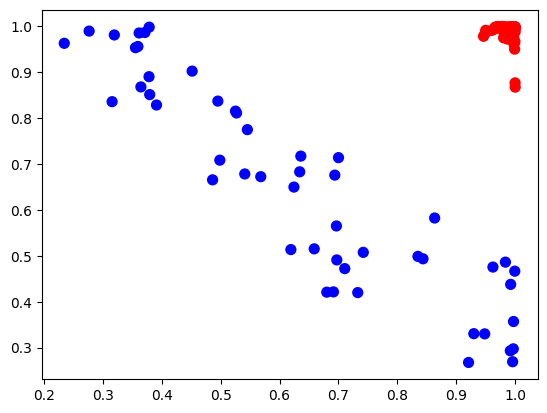

In [37]:
plt.scatter(x_new[:, 0], x_new[:, 1], c=y, s=50, cmap='bwr')